# Final Project: Evaluating the Efficiency of PySpecKit

### Maria Nolan
### Teuben
### PHYS265
### May 18, 2025

In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pyspeckit
from spectral_cube import SpectralCube

In [7]:
# importing data for NGC 6503
data, hdr = fits.getdata('ngc6503.fits', header = True)

# importing data for NGC 253 hα
wavelength_ha, flux_ha = np.loadtxt('ngc253_ha.tab', unpack=True)

# importing data for NGC 253 hβ
wavelength_hb, flux_hb = np.loadtxt('ngc253_hb.tab', unpack=True)


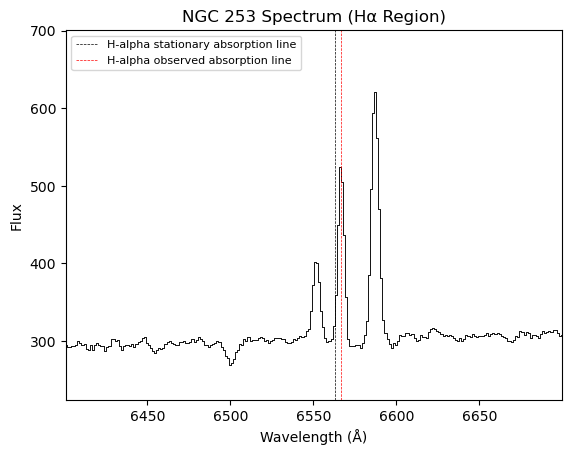

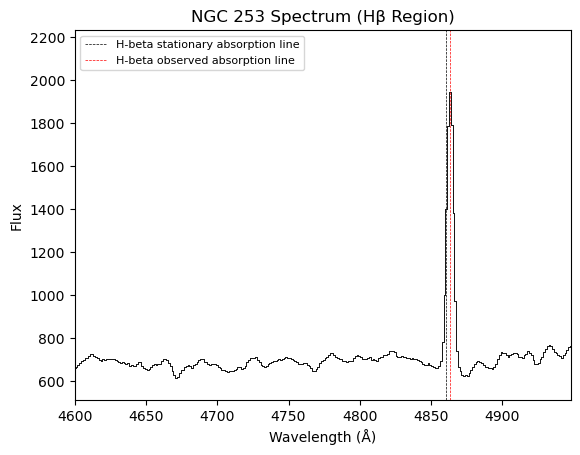

In [28]:
# Plotting NGC 253 Hα Region
spec = pyspeckit.Spectrum(xarr=wavelength_ha, data=flux_ha, xarrkwargs={'unit':'angstrom'})
spec.plotter()
spec.plotter.plot()
spec.plotter.axis.set_ylabel('Flux')
spec.plotter.axis.set_xlabel('Wavelength (Å)')
spec.plotter.axis.set_title('NGC 253 Spectrum (Hα Region)')
spec.plotter.axis.axvline(6562.80, ymin=0, ymax=1, linewidth=0.5, linestyle="--", color='k', label='H-alpha stationary absorption line')
spec.plotter.axis.axvline(6566.50, ymin=0, ymax=1, linewidth=0.5, linestyle="--", color='r', label='H-alpha observed absorption line')
spec.plotter.axis.legend(loc='upper left', fontsize=8)

# Plotting NGC 253 Hβ Region
spec = pyspeckit.Spectrum(xarr=wavelength_hb, data=flux_hb, xarrkwargs={'unit':'angstrom'})
spec.plotter()
spec.plotter.plot()
spec.plotter.axis.set_ylabel('Flux')
spec.plotter.axis.set_xlabel('Wavelength (Å)')
spec.plotter.axis.set_title('NGC 253 Spectrum (Hβ Region)')
spec.plotter.axis.axvline(4861, ymin=0, ymax=1, linewidth=0.5, linestyle="--", color='k', label='H-beta stationary absorption line')
spec.plotter.axis.axvline(4863.5, ymin=0, ymax=1, linewidth=0.5, linestyle="--", color='r', label='H-beta observed absorption line')
spec.plotter.axis.legend(loc='upper left', fontsize=8)


Original CTYPE3: FREQ
Original CUNIT3: Hz


Cube is a Stokes cube, returning spectral cube for I component


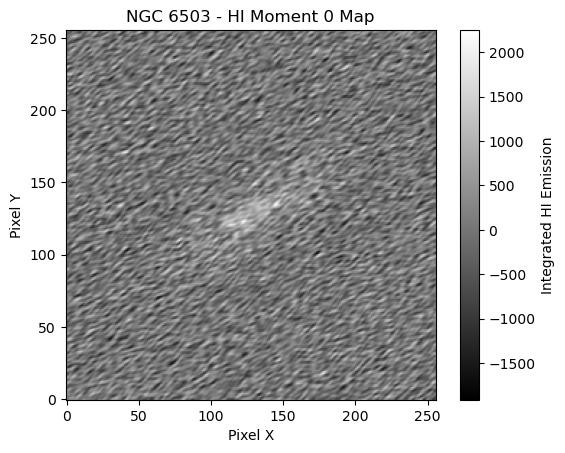

In [11]:
# Open the FITS file in update mode
hdul = fits.open('ngc6503.fits', mode='update')

# Print to confirm original header
print('Original CTYPE3:', hdul[0].header.get('CTYPE3', 'Missing'))
print('Original CUNIT3:', hdul[0].header.get('CUNIT3', 'Missing'))

# Correct it
hdul[0].header['CTYPE3'] = 'FREQ'  # Frequency axis
hdul[0].header['CUNIT3'] = 'Hz'    # Unit is Hertz

# Save
hdul.flush()
hdul.close()

cube = SpectralCube.read('ngc6503.fits')

moment0 = cube.moment(order=0)

fig, ax = plt.subplots()
plot = ax.imshow(moment0.hdu.data, origin='lower', cmap='gray')
cbar = fig.colorbar(plot, ax=ax)
cbar.set_label('Integrated HI Emission')
ax.set_title('NGC 6503 - HI Moment 0 Map');
ax.set_xlabel('Pixel X');
ax.set_ylabel('Pixel Y');

In [10]:
print(pyspeckit.__version__)

1.0.4.dev
